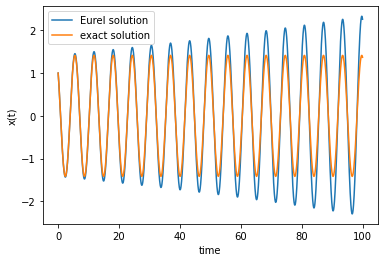

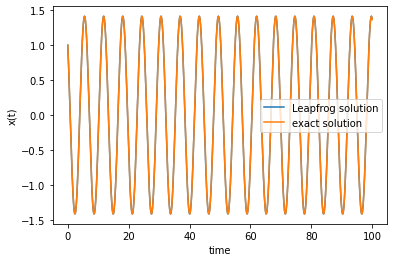

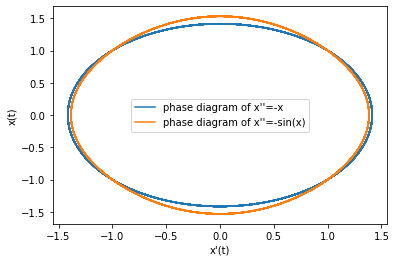

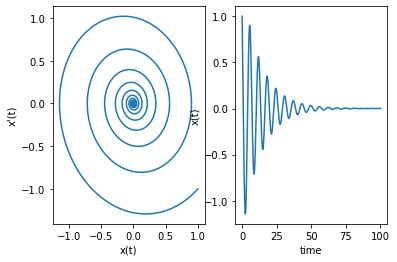

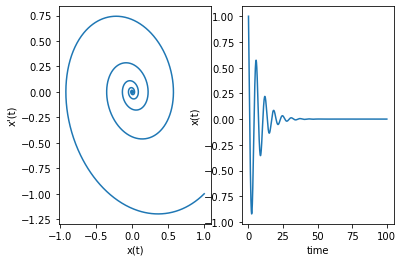

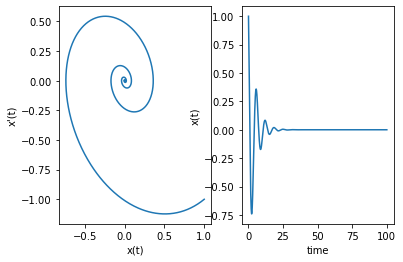

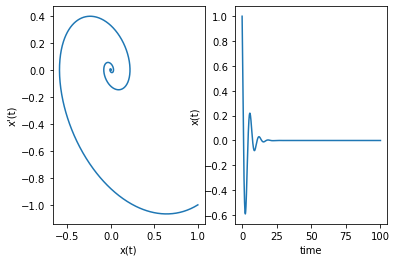

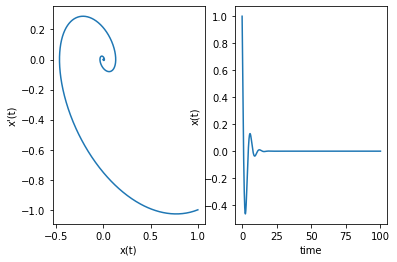

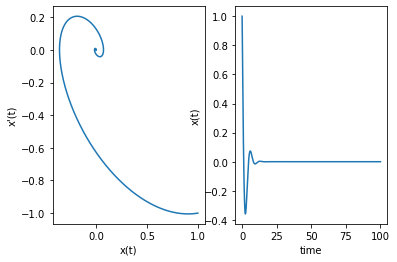

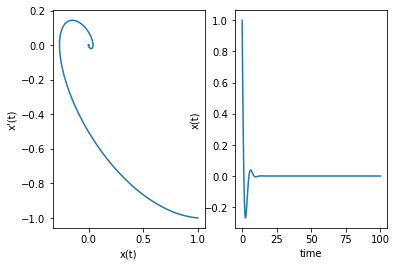

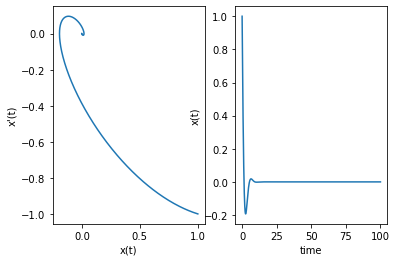

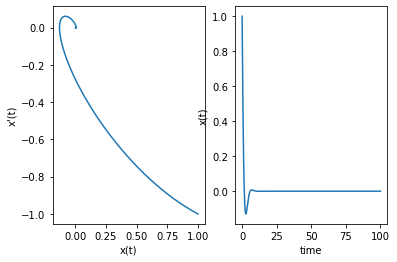

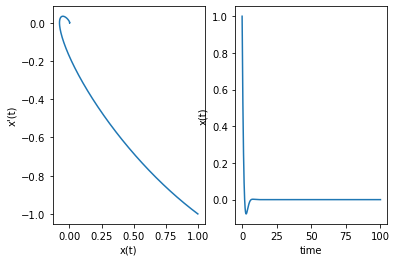

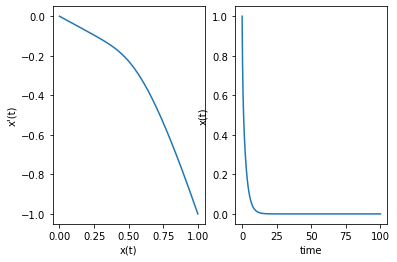

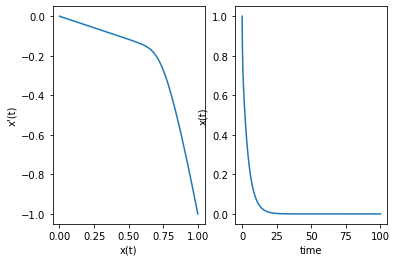

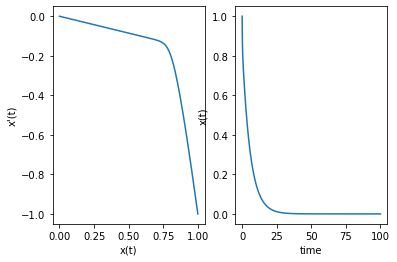

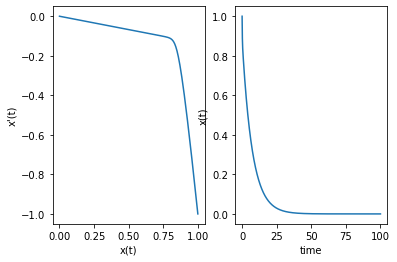

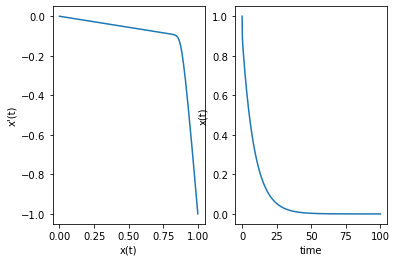

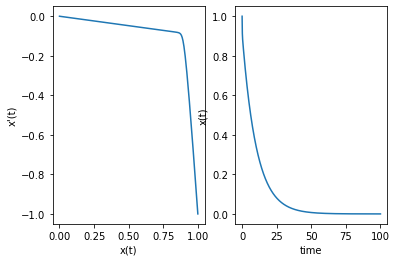

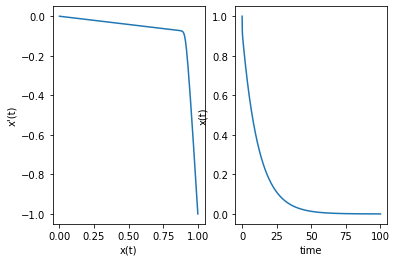

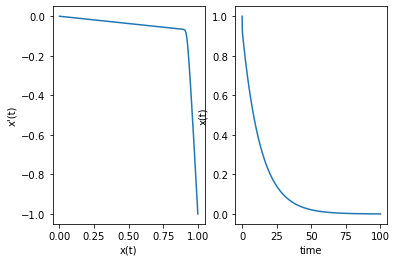

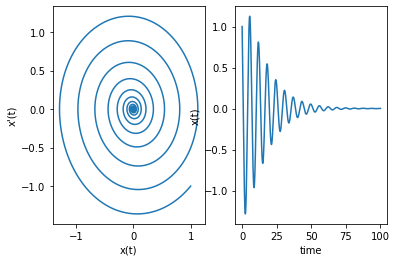

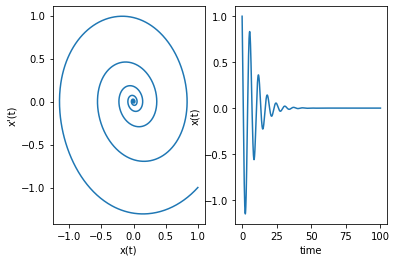

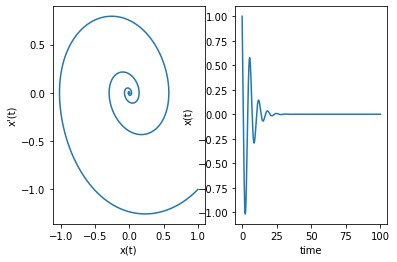

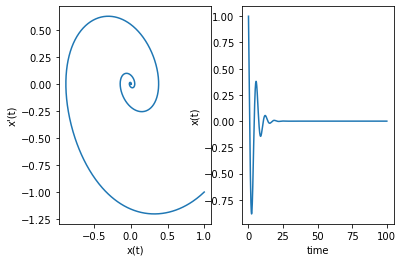

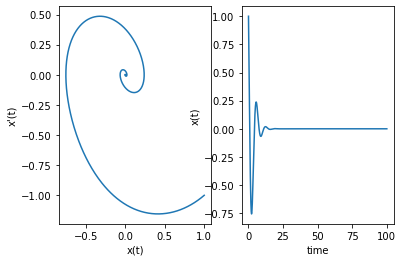

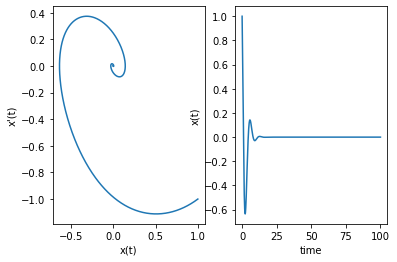

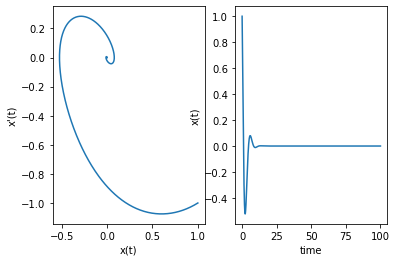

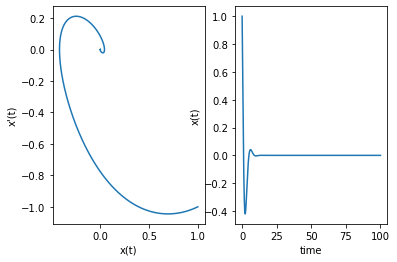

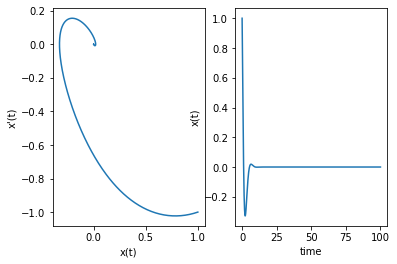

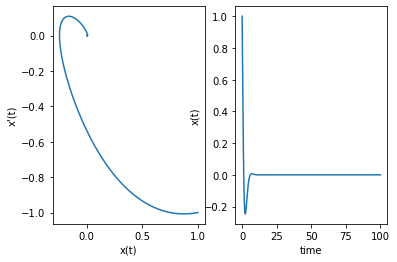

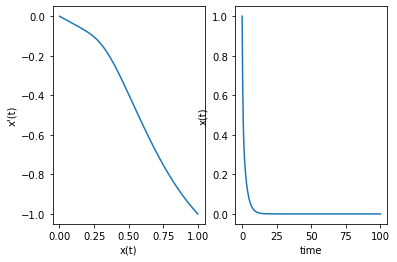

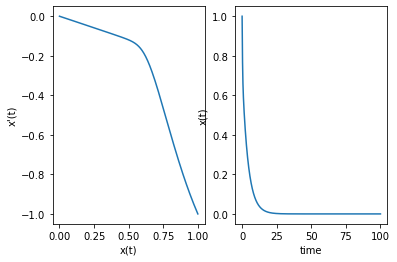

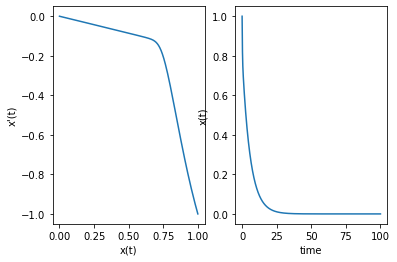

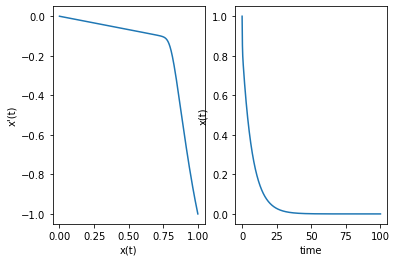

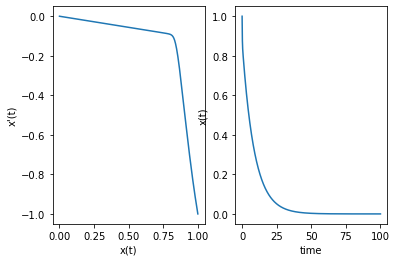

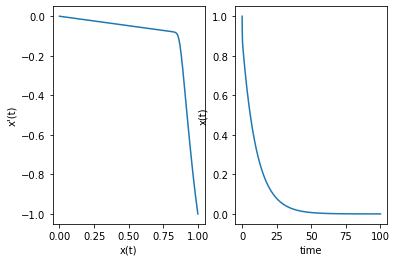

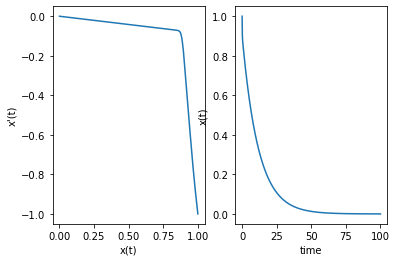

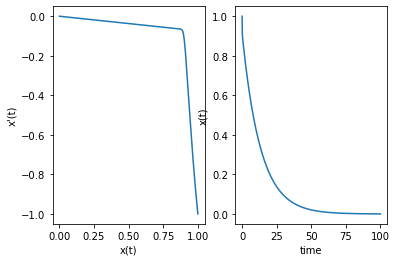

In [2]:
# %load patrick_uwayo_PPS2.py
#!/usr/bin/env python
# %%
import numpy as np
from numpy.linalg import solve
from scipy.optimize import fsolve
from scipy.integrate import odeint, quad
import matplotlib.pyplot as plt


# %% [markdown]
# # Question 3

# %% [markdown]
# # A

# %%
def EurlerrMethod(a,b):
    dt=0.01
    t=np.arange(a,b+dt,dt)
    f=lambda x:-x
    v=[-1]
    x=[1]
    for i in range(len(t)-1):
        v.append(v[i]+dt*f(x[i]))
        x.append(x[i]+dt*v[i])
    return t,x


# %% [markdown]
# To get the exact solution we need to solve equation $\ddot{x}=-x$ analyticaly not numerically.
# Then then we get $x(t)=cos(t)-sin(t)$ and then we plot it with Eurel solution:

# %%
g=lambda t:np.cos(t)-np.sin(t)
plt.plot(EurlerrMethod(0,100)[0],EurlerrMethod(0,100)[1],label="Eurel solution")
plt.plot(EurlerrMethod(0,100)[0],g(EurlerrMethod(0,100)[0]),label="exact solution")
#plt.title("the plot of x(t) by Euler Method")
plt.xlabel("time")
plt.ylabel("x(t)")
plt.legend()
plt.show()


# %% [markdown]
#
# # B

# %%
def LeapfrogMethod(a,b):
    dt=0.01
    t=np.arange(a,b+dt,dt)
    f=lambda x:-x
    v=[-1]
    x=[1]
    for i in range(len(t)-1):
        x.append(x[i]+dt*v[i]+(1/2)*(dt**2)*f(x[i]))
        v.append(v[i]+(1/2)*dt*(f(x[i+1])+f(x[i])))
    return t,x,v

g=lambda t:np.cos(t)-np.sin(t)
plt.plot(LeapfrogMethod(0,100)[0],LeapfrogMethod(0,100)[1],label="Leapfrog solution")
plt.plot(LeapfrogMethod(0,100)[0],g(LeapfrogMethod(0,100)[0]),label="exact solution")
plt.xlabel("time")
plt.ylabel("x(t)")
plt.legend()
plt.show()    


# %% [markdown]
# # C

# %%
def LeapfrogMethod2(a,b):
    dt=0.01
    t=np.arange(a,b+dt,dt)
    f=lambda x:-np.sin(x)
    v=[-1]
    x=[1]
    for i in range(len(t)-1):
        x.append(x[i]+dt*v[i]+(1/2)*(dt**2)*f(x[i]))
        v.append(v[i]+(1/2)*dt*(f(x[i+1])+f(x[i])))
    return v,x
plt.plot(LeapfrogMethod(0,100)[2],LeapfrogMethod(0,100)[1],label="phase diagram of x''=-x")
plt.plot(LeapfrogMethod2(0,100)[0],LeapfrogMethod2(0,100)[1],label="phase diagram of x''=-sin(x)")
plt.xlabel("x'(t)")
plt.ylabel("x(t)")
plt.legend()
plt.show()


# %% [markdown]
# The phase diagrams ($\ddot{x},x$) of $\ddot{x}=-x$ and $\ddot{x}=-sin(x)$ are slightly the same.
#
#

# %% [markdown]
# # D

# %%
def LeapfrogMethod3(a,b,beta):
    dt=0.01
    t=np.arange(a,b+dt,dt)
    f=lambda x,v,beta:-x-beta*v
    v=[-1]
    x=[1]
    for i in range(len(t)-1):
        x.append(x[i]+dt*v[i]+(1/2)*(dt**2)*f(x[i],v[i],beta))
        v.append(v[i]+(1/2)*dt*(f(x[i+1],v[i]+(x[i+1]-x[i])/dt,beta)+f(x[i],v[i],beta)))
    return v,x,t
for beta in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9]:
    plt.subplot(1,2,1)
    plt.plot(LeapfrogMethod3(0,100,beta)[1],LeapfrogMethod3(0,100,beta)[0])
    plt.xlabel("x(t)")
    plt.ylabel("x'(t)")
    plt.subplot(1,2,2)
    plt.plot(LeapfrogMethod3(0,100,beta)[2],LeapfrogMethod3(0,100,beta)[1])
    plt.xlabel("time")
    plt.ylabel("x(t)")
    plt.show()


# %% [markdown]
# # E

# %%
def LeapfrogMethod4(a,b,beta):
    dt=0.01
    t=np.arange(a,b+dt,dt)
    f=lambda x,v,beta:-x-beta*np.sin(v)
    v=[-1]
    x=[1]
    for i in range(len(t)-1):
        x.append(x[i]+dt*v[i]+(1/2)*(dt**2)*f(x[i],v[i],beta))
        v.append(v[i]+(1/2)*dt*(f(x[i+1],v[i]+(x[i+1]-x[i])/dt,beta)+f(x[i],v[i],beta)))
    return v,x,t
for beta in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9]:
    plt.subplot(1,2,1)
    plt.plot(LeapfrogMethod4(0,100,beta)[1],LeapfrogMethod4(0,100,beta)[0])
    plt.xlabel("x(t)")
    plt.ylabel("x'(t)")
    plt.subplot(1,2,2)
    plt.plot(LeapfrogMethod4(0,100,beta)[2],LeapfrogMethod4(0,100,beta)[1])
    plt.xlabel("time")
    plt.ylabel("x(t)")
    plt.show()

# %% [markdown]
# The previous force is more damping.


<font color='red'> Good